In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import random 
import os, shutil

In [10]:
print(len(os.listdir('C:/Users/pstrz/Digit/test/0')))

1000


In [11]:
print(len(os.listdir('C:/Users/pstrz/Digit/train/0')))

5000


In [12]:
print(len(os.listdir('C:/Users/pstrz/Digit/validation/0')))

1000


In [14]:
base_dir = 'C:/Users/pstrz/Digit'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [57]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=10,
                                   zoom_range = 0.10, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        rotation_range=10,  
                                        zoom_range = 0.10,  
                                        width_shift_range=0.1, 
                                        height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [75]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(32,32), batch_size = 50, class_mode='sparse')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(32,32), batch_size = 50, class_mode='sparse')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(32,32), class_mode='sparse')

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [49]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 2, 2, 128)      

In [59]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

In [60]:
history = model.fit(train_generator, steps_per_epoch = 1000, epochs = 5, 
                             validation_data = validation_generator, validation_steps = 200)

Epoch 1/5
1000/1000 [==============================] - 80s 80ms/step - loss: 0.1723 - accuracy: 0.9496 - val_loss: 0.0586 - val_accuracy: 0.9825
Epoch 2/5
1000/1000 [==============================] - 81s 81ms/step - loss: 0.1247 - accuracy: 0.9627 - val_loss: 0.0461 - val_accuracy: 0.9850
Epoch 3/5
1000/1000 [==============================] - 77s 77ms/step - loss: 0.1116 - accuracy: 0.9689 - val_loss: 0.0571 - val_accuracy: 0.9836
Epoch 4/5
1000/1000 [==============================] - 80s 80ms/step - loss: 0.1007 - accuracy: 0.9704 - val_loss: 0.0575 - val_accuracy: 0.9821
Epoch 5/5
1000/1000 [==============================] - 81s 81ms/step - loss: 0.0992 - accuracy: 0.9725 - val_loss: 0.0576 - val_accuracy: 0.9832


In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

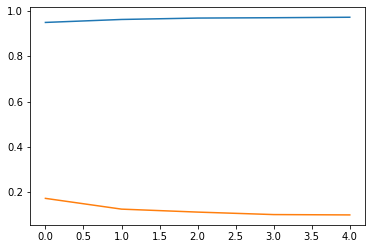

In [62]:
plt.plot(epochs, acc)
plt.plot(epochs, loss)

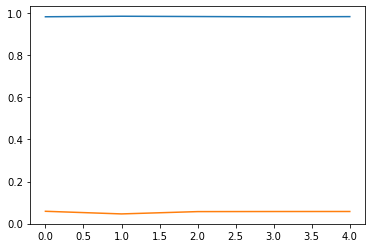

In [63]:
plt.plot(epochs, val_acc)
plt.plot(epochs, val_loss)

In [76]:
model.evaluate(test_generator)

313/313 [==============================] - 5s 16ms/step - loss: 0.0857 - accuracy: 0.9810


[0.08566710352897644, 0.9810000061988831]

In [106]:
vid = cv2.VideoCapture(0)
vid.set(3,640)
vid.set(4,480)

while(True):
    ret, frame = vid.read()
    
    img = np.asarray(frame)
    img = cv2.resize(img,(32,32))
    img = img/255
    
    
    img = img.reshape(1,32,32,3)
    prediction = model.predict(img)
    pred_index = prediction.argmax()
    
    text = cv2.putText(frame, str(pred_index) + ' ' + str(round(prediction.reshape(10)[pred_index] * 100,2)) + '%', (20,50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
    print(pred_index, prediction.reshape(10)[pred_index])
    
    cv2.imshow('Processed Image', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 15ms/step
4 0.6723693
1/1 [==============================] - 0s 15ms/step
4 0.6349156
1/1 [==============================] - 0s 15ms/step
4 0.5637129
1/1 [==============================] - 0s 16ms/step
2 0.39040616
1/1 [==============================] - 0s 14ms/step
2 0.6531259
1/1 [==============================] - 0s 14ms/step
2 0.6945675
1/1 [==============================] - 0s 15ms/step
2 0.8718865
1/1 [==============================] - 0s 16ms/step
2 0.726299
1/1 [==============================] - 0s 16ms/step
4 0.54647845
1/1 [==============================] - 0s 15ms/step
2 0.53508055
1/1 [==============================] - 0s 18ms/step
2 0.60783744
1/1 [==============================] - 0s 15ms/step
2 0.7422199
1/1 [==============================] - 0s 15ms/step
2 0.6852065
1/1 [==============================] - 0s 15ms/step
3 0.4873915
1/1 [==============================] - 0s 33ms/step
3 0.89337015
1/1 [==============================]

1/1 [==============================] - 0s 15ms/step
2 0.8260791
1/1 [==============================] - 0s 16ms/step
2 0.88060075
1/1 [==============================] - 0s 15ms/step
2 0.88060075
1/1 [==============================] - 0s 15ms/step
2 0.93770266
1/1 [==============================] - 0s 15ms/step
2 0.6977898
1/1 [==============================] - 0s 15ms/step
2 0.7860582
1/1 [==============================] - 0s 14ms/step
2 0.7860582
1/1 [==============================] - 0s 16ms/step
2 0.83887815
1/1 [==============================] - 0s 15ms/step
2 0.6702183
1/1 [==============================] - 0s 15ms/step
2 0.6702183
1/1 [==============================] - 0s 17ms/step
2 0.7152265
1/1 [==============================] - 0s 14ms/step
2 0.62044704
1/1 [==============================] - 0s 14ms/step
2 0.6525832
1/1 [==============================] - 0s 14ms/step
2 0.6525832
1/1 [==============================] - 0s 15ms/step
2 0.6578023
1/1 [==============================

1/1 [==============================] - 0s 14ms/step
5 0.9790373
1/1 [==============================] - 0s 14ms/step
5 0.56960726
1/1 [==============================] - 0s 15ms/step
1 0.56502014
1/1 [==============================] - 0s 15ms/step
1 0.56502014
1/1 [==============================] - 0s 15ms/step
9 0.481956
1/1 [==============================] - 0s 14ms/step
1 0.64269036
1/1 [==============================] - 0s 14ms/step
1 0.64269036
1/1 [==============================] - 0s 14ms/step
1 0.34000933
1/1 [==============================] - 0s 14ms/step
1 0.374746
1/1 [==============================] - 0s 15ms/step
1 0.374746
1/1 [==============================] - 0s 15ms/step
1 0.40134746
1/1 [==============================] - 0s 15ms/step
1 0.38922027
1/1 [==============================] - 0s 16ms/step
1 0.34508735
1/1 [==============================] - 0s 14ms/step
1 0.34508735
1/1 [==============================] - 0s 14ms/step
1 0.449682
1/1 [=============================

1/1 [==============================] - 0s 14ms/step
3 0.89991343
1/1 [==============================] - 0s 14ms/step
4 0.5482636
1/1 [==============================] - 0s 14ms/step
8 0.6687847
1/1 [==============================] - 0s 14ms/step
8 0.59995216
1/1 [==============================] - 0s 14ms/step
8 0.59995216
1/1 [==============================] - 0s 14ms/step
7 0.9446526
1/1 [==============================] - 0s 13ms/step
7 0.9016959
1/1 [==============================] - 0s 15ms/step
7 0.8190671
1/1 [==============================] - 0s 15ms/step
7 0.8190671
1/1 [==============================] - 0s 14ms/step
7 0.962727
1/1 [==============================] - 0s 15ms/step
7 0.9922246
1/1 [==============================] - 0s 15ms/step
7 0.97530615
1/1 [==============================] - 0s 15ms/step
7 0.97530615
1/1 [==============================] - 0s 15ms/step
7 0.9383911
1/1 [==============================] - 0s 14ms/step
7 0.9563571
1/1 [==============================]

1/1 [==============================] - 0s 14ms/step
1 0.45972285
1/1 [==============================] - 0s 14ms/step
1 0.45972285
1/1 [==============================] - 0s 16ms/step
9 0.36885688
1/1 [==============================] - 0s 16ms/step
9 0.56670094
1/1 [==============================] - 0s 15ms/step
9 0.56670094
1/1 [==============================] - 0s 15ms/step
9 0.4778102
1/1 [==============================] - 0s 16ms/step
5 0.5892494
1/1 [==============================] - 0s 17ms/step
9 0.60572296
1/1 [==============================] - 0s 15ms/step
9 0.60572296
1/1 [==============================] - 0s 15ms/step
9 0.83258164
1/1 [==============================] - 0s 14ms/step
9 0.8196907
1/1 [==============================] - 0s 14ms/step
9 0.84510994
1/1 [==============================] - 0s 14ms/step
9 0.84510994
1/1 [==============================] - 0s 14ms/step
5 0.49185854
1/1 [==============================] - 0s 14ms/step
9 0.55345905
1/1 [=======================

1/1 [==============================] - 0s 14ms/step
2 0.58383447
1/1 [==============================] - 0s 15ms/step
2 0.7025947
1/1 [==============================] - 0s 14ms/step
2 0.79060495
1/1 [==============================] - 0s 15ms/step
2 0.8170942
1/1 [==============================] - 0s 14ms/step
2 0.8094808
1/1 [==============================] - 0s 14ms/step
2 0.8094808
1/1 [==============================] - 0s 14ms/step
2 0.9270553
1/1 [==============================] - 0s 15ms/step
2 0.9270553
1/1 [==============================] - 0s 14ms/step
2 0.9253282
1/1 [==============================] - 0s 14ms/step
2 0.93068314
1/1 [==============================] - 0s 15ms/step
2 0.92393744
1/1 [==============================] - 0s 14ms/step
2 0.92393744
1/1 [==============================] - 0s 14ms/step
2 0.9251988
1/1 [==============================] - 0s 15ms/step
2 0.6962041
1/1 [==============================] - 0s 14ms/step
2 0.7708721
1/1 [==============================

1/1 [==============================] - 0s 15ms/step
2 0.34321043
1/1 [==============================] - 0s 16ms/step
7 0.5937416
1/1 [==============================] - 0s 14ms/step
7 0.5937416
1/1 [==============================] - 0s 15ms/step
7 0.6320024
1/1 [==============================] - 0s 15ms/step
7 0.6320024
1/1 [==============================] - 0s 14ms/step
7 0.541133
1/1 [==============================] - 0s 14ms/step
3 0.6523213
1/1 [==============================] - 0s 16ms/step
3 0.7345075
1/1 [==============================] - 0s 15ms/step
3 0.7345075
1/1 [==============================] - 0s 14ms/step
2 0.6874284
1/1 [==============================] - 0s 14ms/step
0 0.76032877
1/1 [==============================] - 0s 16ms/step
0 0.5467832
1/1 [==============================] - 0s 15ms/step
0 0.5467832
1/1 [==============================] - 0s 14ms/step
9 0.4459422
1/1 [==============================] - 0s 14ms/step
2 0.62788105
1/1 [==============================] -

1/1 [==============================] - 0s 16ms/step
1 0.26390424
1/1 [==============================] - 0s 15ms/step
1 0.44902483
1/1 [==============================] - 0s 15ms/step
1 0.4231986
1/1 [==============================] - 0s 19ms/step
1 0.4231986
1/1 [==============================] - 0s 17ms/step
1 0.514941
1/1 [==============================] - 0s 22ms/step
1 0.52612084
1/1 [==============================] - 0s 17ms/step
1 0.99717975
1/1 [==============================] - 0s 17ms/step
1 0.9979569
1/1 [==============================] - 0s 18ms/step
1 0.9979569
1/1 [==============================] - 0s 14ms/step
1 0.93350226
1/1 [==============================] - 0s 15ms/step
1 0.9641717
1/1 [==============================] - 0s 15ms/step
1 0.9785922
1/1 [==============================] - 0s 14ms/step
1 0.9785922
1/1 [==============================] - 0s 15ms/step
1 0.9995715
1/1 [==============================] - 0s 15ms/step
1 0.99996066
1/1 [==============================